Import the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
raw_data = pd.read_csv("Dataset/iris.csv")

In [4]:
raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploring the flower features uisng visualizations

In [ ]:
#brief statistical overview of the data
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#check for missing values
raw_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 1.0, 'Count Plot of the Flower Species')

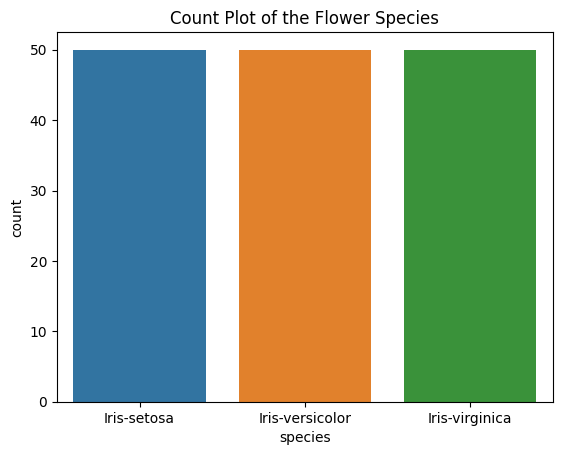

In [11]:
#getting a count plot of the species
sns.countplot(raw_data, x = 'species', hue = 'species')
plt.title("Count Plot of the Flower Species")

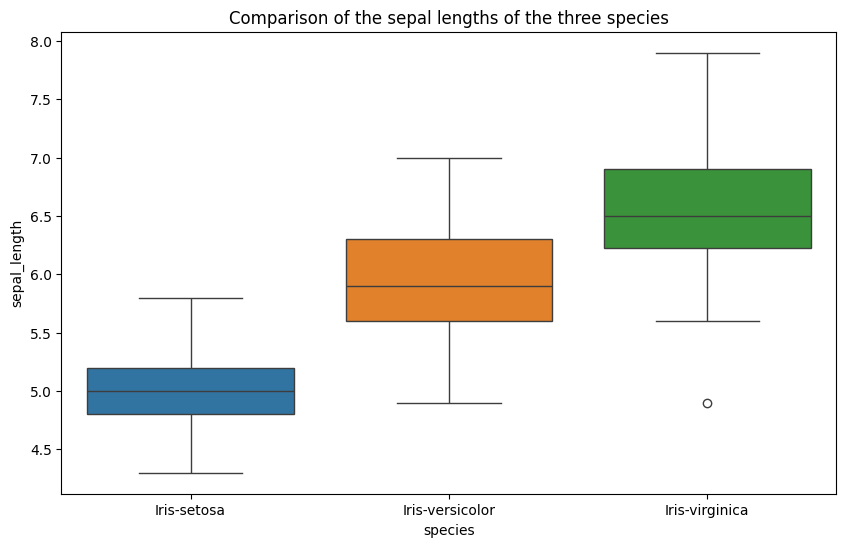

In [12]:
#comparing the sepal lengths of the three species
#filtered_specie = raw_data[raw_data['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

plt.figure(figsize = (10,6))
sns.boxplot(raw_data, x='species', y='sepal_length', hue = 'species')
plt.title('Comparison of the sepal lengths of the three species')
plt.show()

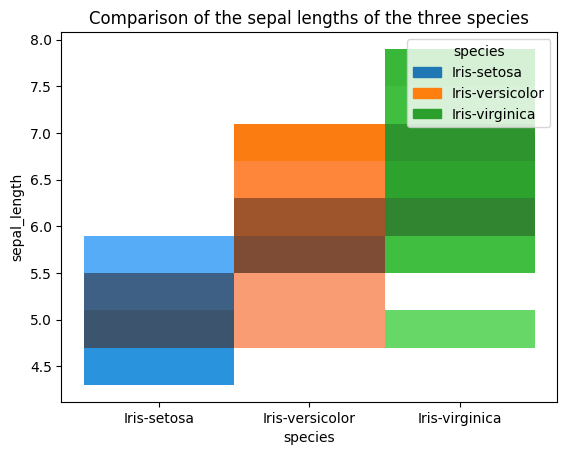

In [14]:
sns.histplot(raw_data, x = 'species', y='sepal_length', hue='species')
plt.title('Comparison of the sepal lengths of the three species')
plt.show()

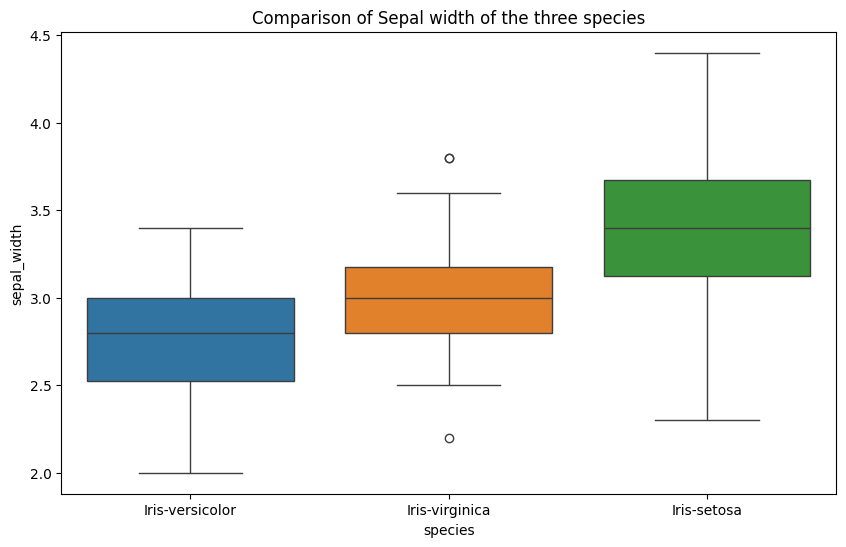

In [19]:
#comparing the sepal width of the three species
plt.figure(figsize = (10, 6))
sns.boxplot(x='species',y='sepal_width',data=raw_data.sort_values('sepal_width',ascending=True), hue = 'species')

plt.title("Comparison of Sepal width of the three species")
plt.show()

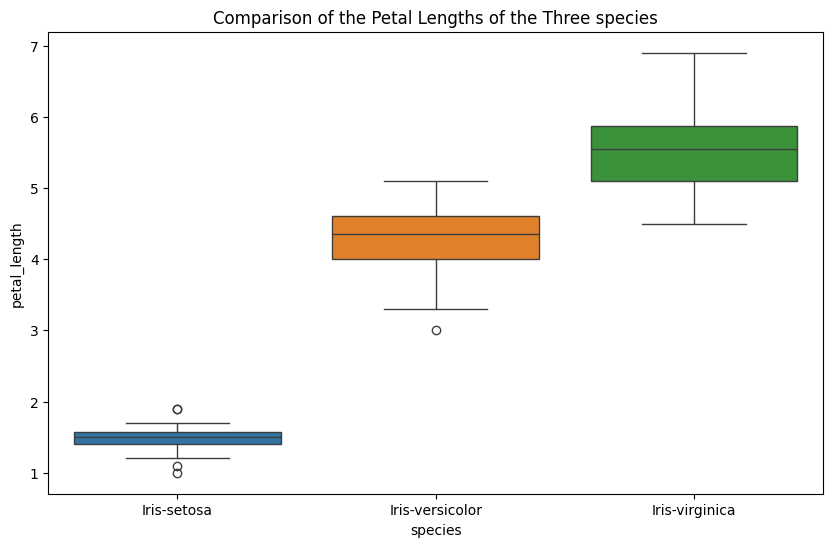

In [20]:
#comparing the petal length of the three species
plt.figure(figsize = (10, 6))
sns.boxplot(x= 'species', y = 'petal_length', data = raw_data.sort_values('petal_length', ascending=True), hue = 'species')
plt.title('Comparison of the Petal Lengths of the Three species')
plt.show()

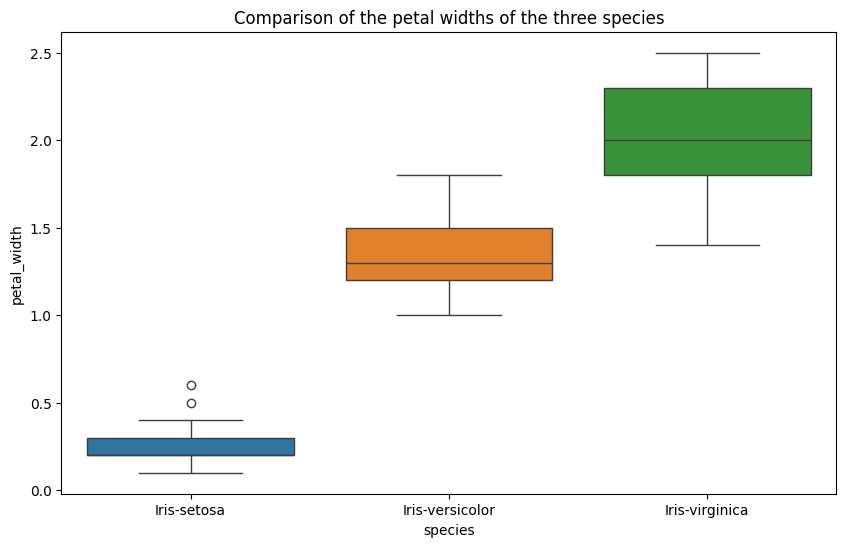

In [22]:
#comparing the petal Width of the three species
plt.figure(figsize = (10,6))
plt.title("Comparison of the petal widths of the three species")
sns.boxplot(x = 'species', y='petal_width', data = raw_data.sort_values('petal_width', ascending = True), hue = 'species')
plt.show()

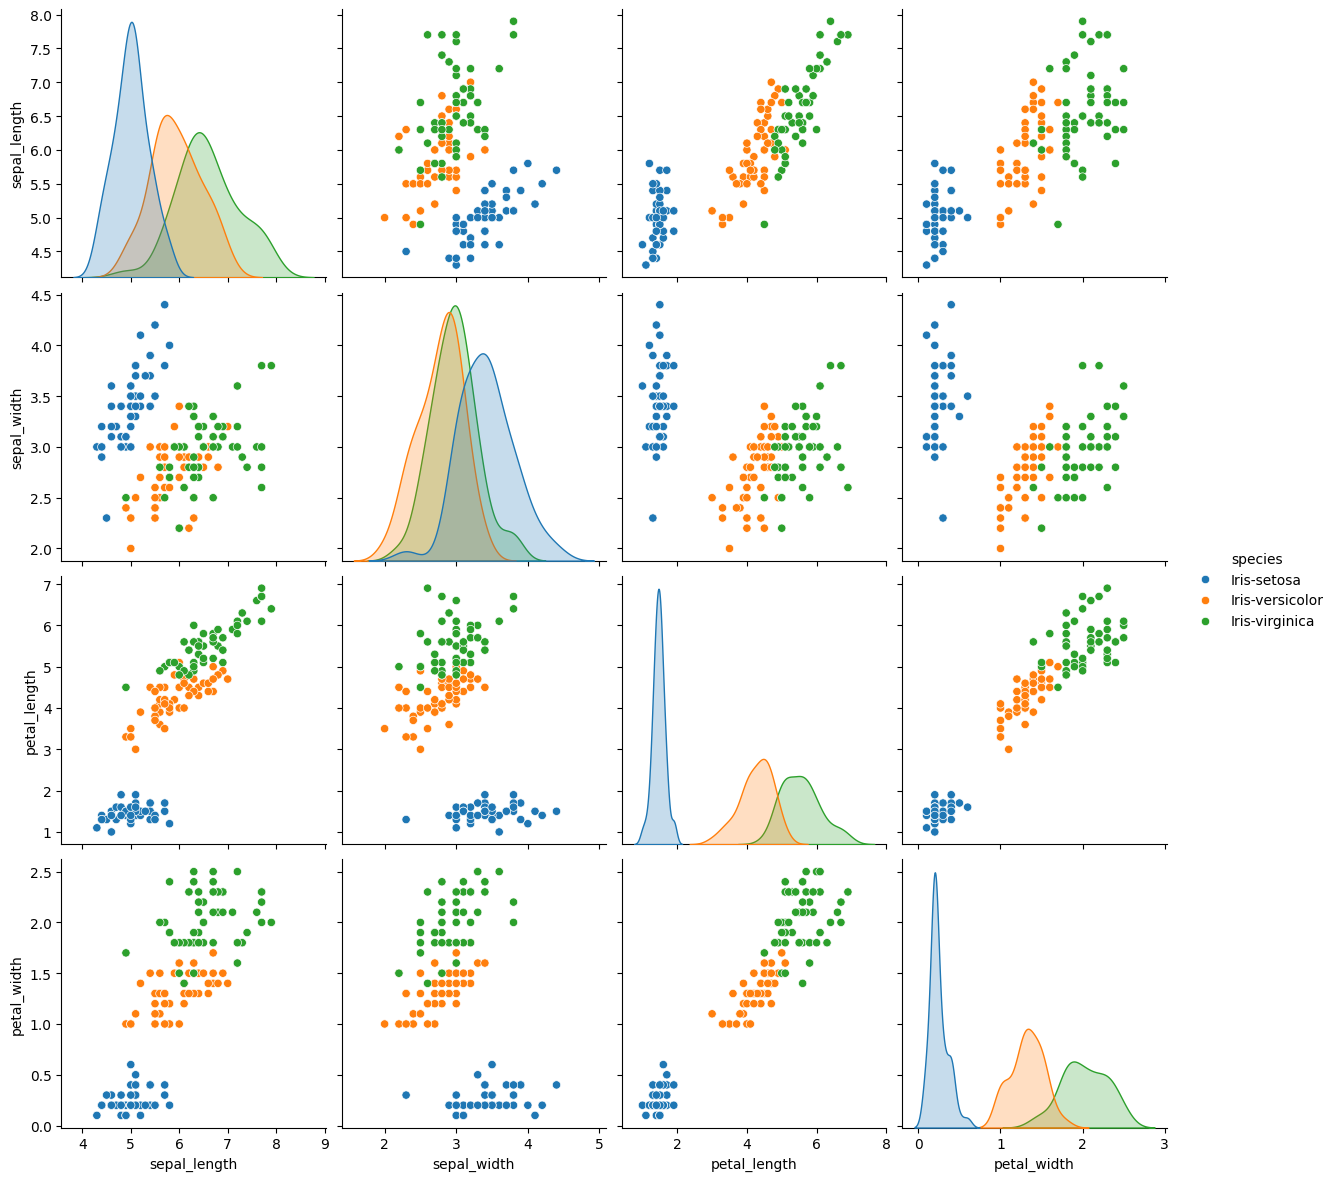

In [27]:
#creating a pairplot 
sns.pairplot(raw_data, hue = 'species', height = 3)


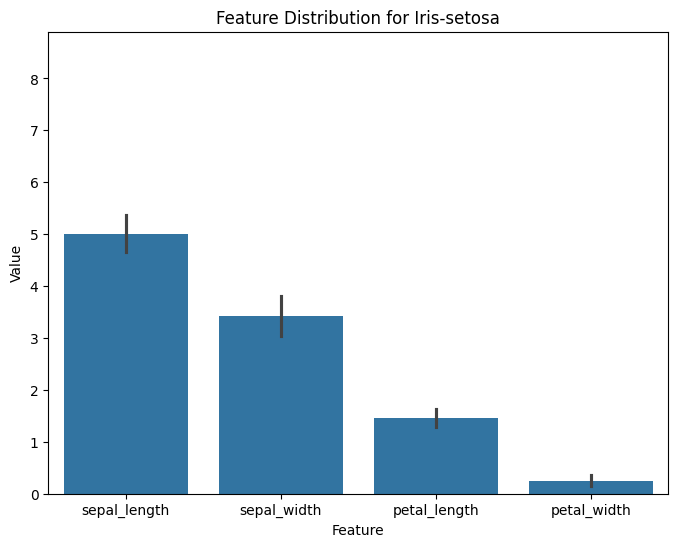

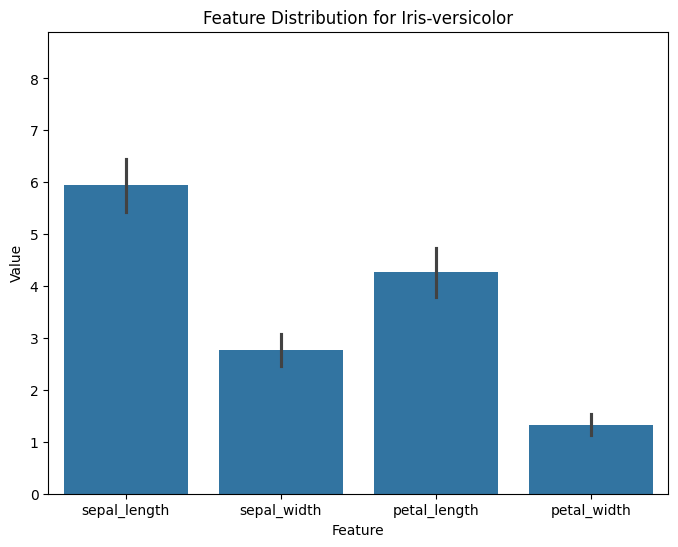

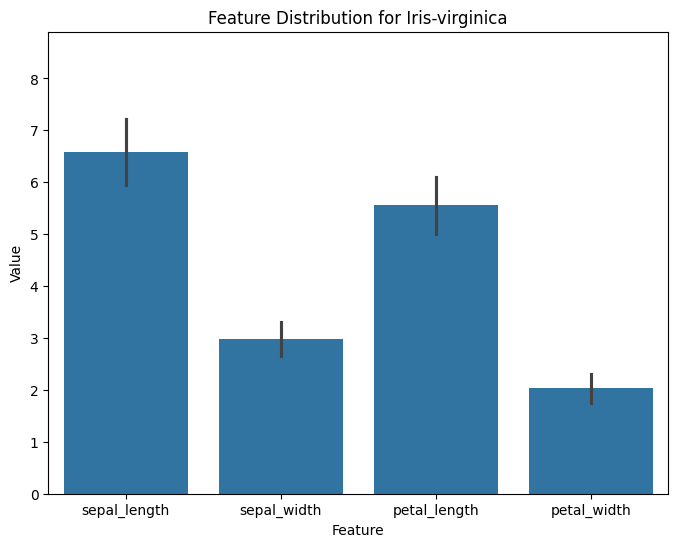

In [ ]:
#Feature Distribution for each specie

specie_list = raw_data['species'].unique()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for specie in specie_list:
    specie_data = raw_data[raw_data['species'] == specie][features]
    melt_data = pd.melt(specie_data, var_name = 'feature', value_name='value')
     # Plot the feature distribution for the current species
    plt.figure(figsize=(8, 6))
    sns.barplot(data=melt_data, x='feature', y='value', errorbar="sd")
    plt.title(f"Feature Distribution for {specie.capitalize()}")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.ylim(0, raw_data[features].max().max() + 1)  # Ensure consistent y-axis
    plt.show()

In [ ]:
# A function to calculate covariance

def cov(x, y):
    mean_x = sum(x) / float(len(x)) #to calculate the mean of x
    mean_y = sum(y) / float(len(y)) #to calculate the mean of y

    sub_x = [i - mean_x for i in x ] #subtracting the mean from each x variable 
    sub_y = [i - mean_y for i in y] #subtracting the mean from each y variable
    sum_value =  sum([sub_x[i] * sub_y[i] for i in range (len(x))]) # sum of all the product difference

    denom = float (len(x) - 1) 

    covariance_value = sum_value / denom # divide the sum by the number of samples

    return covariance_value
    
        

    

 

In [31]:
# A function to calculate covariance matrix

def covMat(arr):
    c = [[cov(a,b) for a in arr] for b in arr]
    return c